<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/M6%20Profundiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEMA 1: Reducción de Dimensionalidad e Ingeniería de Características

## **Subtema 1.1 Análisis de Componentes Principales - Código**

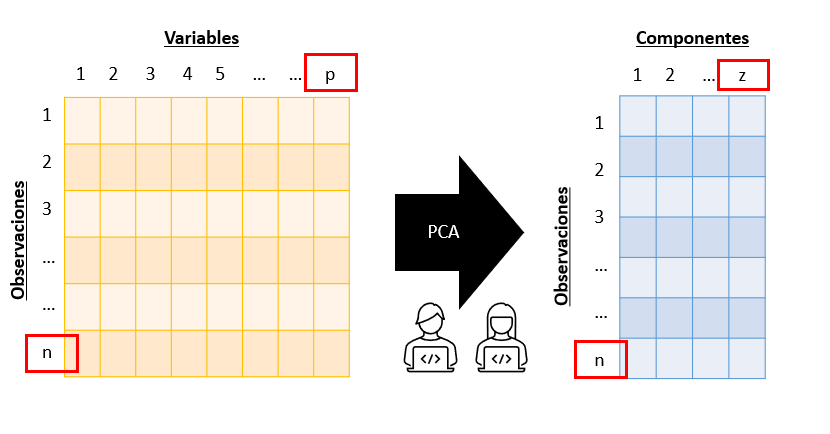

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = sm.datasets.get_rdataset("iris", "datasets")
datos = iris.data


In [3]:
iris

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
datos

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
print('Media de cada variable')
datos.describe().T

Media de cada variable


,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [10]:
print('Desviación estándar de cada variable')
datos.describe().T

Desviación estándar de cada variable


,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [17]:
datos[datos.describe().columns.values].var()

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [18]:
escalar = StandardScaler()

In [20]:
#para iris
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
# Separating out the features
x = datos.loc[:, features]
# Separating out the target
y = datos.loc[:,['Species']]

In [21]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [24]:
#datos_escalados = escalar.fit(datos)
#datos_escalados = escalar.transform(datos)
datos_escalados = escalar.fit(x)
print(datos_escalados)
print("----------------")
datos_escalados = escalar.transform(x)
datos_escalados

StandardScaler()
----------------


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [25]:
pca_model = PCA(n_components = 4)

In [26]:
pca_model.fit(datos_escalados)

PCA(n_components=4)

In [27]:
pca_model.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [29]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = x.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [30]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.72962445 0.95813207 0.99482129 1.        ]


In [33]:
#proyecciones = np.dot(pca_model.components_, scale(datos).T)
#proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
#proyecciones = proyecciones.transpose().set_index(datos.index)
#proyecciones

proyecciones = np.dot(pca_model.components_, scale(x).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
#print(proyecciones)

proyecciones = proyecciones.transpose().set_index(x.index)
proyecciones

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [34]:
conjunto_1 = proyecciones[["PC1","PC2"]]
conjunto_1.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [35]:
conjunto_2 = proyecciones[["PC1","PC2","PC3"]]
conjunto_2.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [36]:
conjunto_2 = pd.concat([conjunto_2, datos[['Species']]], axis = 1)
conjunto_2

,PC1,PC2,PC3,Species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
conjunto_1.to_csv('conjunto_1.csv')
!cp conjunto_1.csv "drive/My Drive/su carpeta de drive"

In [ ]:
conjunto_2.to_csv('conjunto_2.csv')
!cp conjunto_2.csv "drive/My Drive/su carpeta de drive"

## **Subtema 1.2. Análisis Factorial**

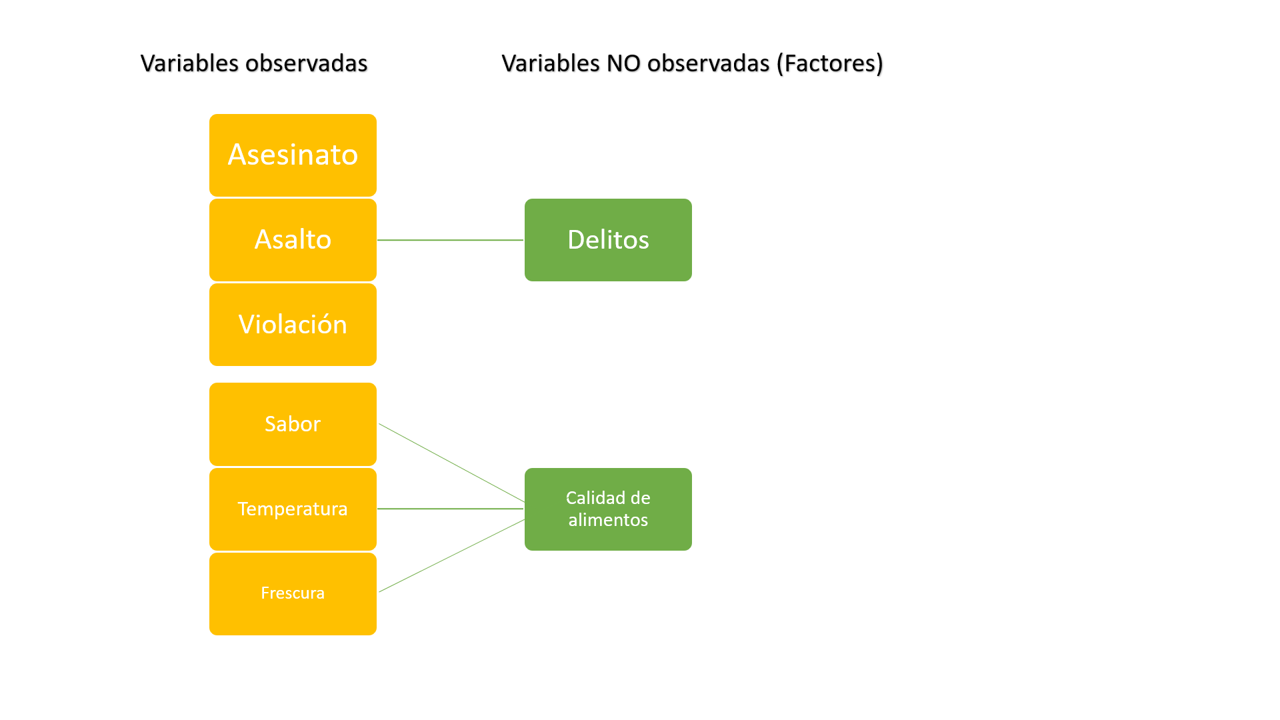

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 40kB 2.7MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=96770cdf91a45d8812228cd924958d187819b34b10d719fc009dea1092cc977f
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
iris = sm.datasets.get_rdataset("iris", "datasets")
datos = iris.data

In [ ]:
datos.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print('Media de cada variable')
datos.mean()

Media de cada variable


Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [ ]:
print('Desviación estándar de cada variable')
datos.std()

Desviación estándar de cada variable


Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [ ]:
#Estandarizar - utilizar StandarScarler
escalar = StandardScaler()

In [ ]:
#Separar x de Y
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
# Separating out the features
x = datos.loc[:, features]
# Separating out the target
y = datos.loc[:,['Species']]

In [ ]:
datos_escalados = escalar.fit(x)
datos_escalados = escalar.transform(x)
datos_escalados

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
#Prueba de Barlett para saber si utilizar FA es buena opción

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(datos_escalados)
chi_square_value, p_value


(706.9592430234728, 9.559158957645206e-150)

In [ ]:
# Crear un análisis factorial sin especificaciones de factores para poder extraer
# los valores de los eigenvalores y determinar el número de factores a utilizar
fa = FactorAnalyzer()
fa.fit(datos_escalados)
# Check Eigenvalues
ev, v= fa.get_eigenvalues()
ev

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [ ]:
# Primer escenario
fa = FactorAnalyzer(n_factors = 1) #1 o 2
fa.fit(datos_escalados)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=1, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [ ]:
pd.DataFrame(fa.loadings_)

,0
0,-0.822986
1,0.334364
2,-1.014525
3,-0.974734


In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    =fa.loadings_,
    columns = ['Factor1'],
    index   = x.columns
)

,Factor1
Sepal.Length,-0.822986
Sepal.Width,0.334364
Petal.Length,-1.014525
Petal.Width,-0.974734


In [ ]:
# Segundo Escenario
fa2 = FactorAnalyzer(n_factors = 2) #1 o 2
fa2.fit(datos_escalados)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [ ]:
pd.DataFrame(fa2.loadings_)

,0,1
0,0.941751,0.173090
1,0.012016,1.001381
2,0.955574,-0.131196
3,0.919831,-0.085015


In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    =fa2.loadings_,
    columns = ['Factor1','Factor2'],
    index   = x.columns
)

,Factor1,Factor2
Sepal.Length,0.941751,0.173090
Sepal.Width,0.012016,1.001381
Petal.Length,0.955574,-0.131196
Petal.Width,0.919831,-0.085015


In [ ]:
# Primer escenario
fa.get_factor_variance()

(array([2.76847434]), array([0.69211859]), array([0.69211859]))

In [ ]:
# Segundo escenario
fa2.get_factor_variance()

(array([2.64625105, 1.05716444]),
 array([0.66156276, 0.26429111]),
 array([0.66156276, 0.92585387]))

In [ ]:
datos_fa = pd.DataFrame(fa2.transform(datos_escalados))
datos_fa
#datos_fa.info()

,0,1
0,-1.280154,1.027878
1,-1.499788,-0.122744
2,-1.432940,0.341125
3,-1.270571,0.123532
4,-1.199130,1.262467
...,...,...
145,0.534845,-0.199106
146,0.388466,-1.311932
147,0.745833,-0.161202
148,1.075833,0.753056


In [ ]:
conjunto_fa = pd.concat([datos_fa, datos[['Species']]], axis = 1)
conjunto_fa

,0,1,Species
0,-1.280154,1.027878,setosa
1,-1.499788,-0.122744,setosa
2,-1.432940,0.341125,setosa
3,-1.270571,0.123532,setosa
4,-1.199130,1.262467,setosa
...,...,...,...
145,0.534845,-0.199106,virginica
146,0.388466,-1.311932,virginica
147,0.745833,-0.161202,virginica
148,1.075833,0.753056,virginica


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
conjunto_fa.to_csv('conjunto_fa.csv')
!cp conjunto_fa.csv "drive/My Drive/su carpeta de drive"